#   <center> <font style="color:rgb(100,109,254)"> Contours </font> </center>


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style="color:rgb(134,19,348)"> What are Contours   </font>

Contours can be defined simply as a curve joining all the continuous points (along the boundary), having same color or intensity. You can use contour detection instead of blob detection. Now in contour detection, the objects to be detected are in white and the background is black. Internally in blobdetection, findContour function is also used.

The contours are a useful tool for shape analysis and object detection and recognition.

For e.g in the below image you can find all the objects, get their coordinates and make a bounding box around it. 

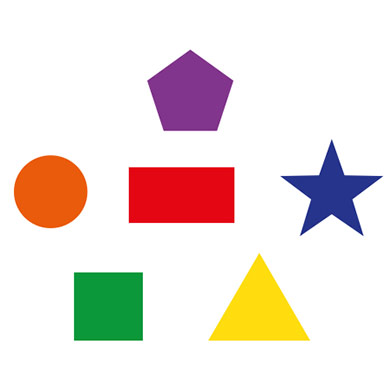

Here's the function you use to find Contours.

> **contours, hierarchy	= cv2.findContours(image, mode, method[, offset])**


- `image`	Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary . You can use compare, inRange, threshold , adaptiveThreshold, Canny, and others to create a binary image out of a gray scale or color one. If mode equals to RETR_CCOMP or RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
- `contours`	Detected contours. Each contour is stored as a vector of points.
- `hierarchy`	Optional output vector, containing information about the image topology. It has as many elements as the number of contours. For each i-th contour contours[i], the elements hierarchy[i][0] , hierarchy[i][1] , hierarchy[i][2] , and hierarchy[i][3] are set to 0-based indices in contours of the next and previous contours at the same hierarchical level, the first child contour and the parent contour, respectively. If for the contour i there are no next, previous, parent, or nested contours, the corresponding elements of hierarchy[i] will be negative.
- `mode`	Contour retrieval mode, see [RetrievalModes](https://docs.opencv.org/4.1.0/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71)
- `method`	Contour approximation method, see [ContourApproximationModes](https://docs.opencv.org/4.1.0/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff)
- `offset`	Optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image - ROI and then they should be analyzed in the whole image context.


After finding the contours, you can index and draw individual contours but Opencv comes with a function to draw contours.

[```image = cv.drawContours(	image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[,offset]]]]])```](https://docs.opencv.org/4.2.0/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc)

- `image`	Destination image.
- `contours`	All the input contours. Each contour is stored as a point vector.
- `contourIdx`	Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
- `color`	Color of the contours.
- `thickness`	Thickness of lines the contours are drawn with. If it is negative (for example, thickness=FILLED ), the contour interiors are drawn.
- `lineType`	Line connectivity. See LineTypes
- `hierarchy`	Optional information about hierarchy. It is only needed if you want to draw only some of the contours (see maxLevel ).
- `maxLevel`	Maximal level for drawn contours. If it is 0, only the specified contour is drawn. If it is 1, the function draws the contour(s) and all the nested contours. If it is 2, the function draws the contours, all the nested contours, all the nested-to-nested contours, and so on. This parameter is only taken into account when there is hierarchy available.
- `offset`	Optional contour shift parameter. Shift all the drawn contours by the specified \(\texttt{offset}=(dx,dy)\) .

## <font style="color:rgb(134,19,348)"> Contour Detection in OpenCV  </font>
Below is a basic setup for contour detection in OpenCV

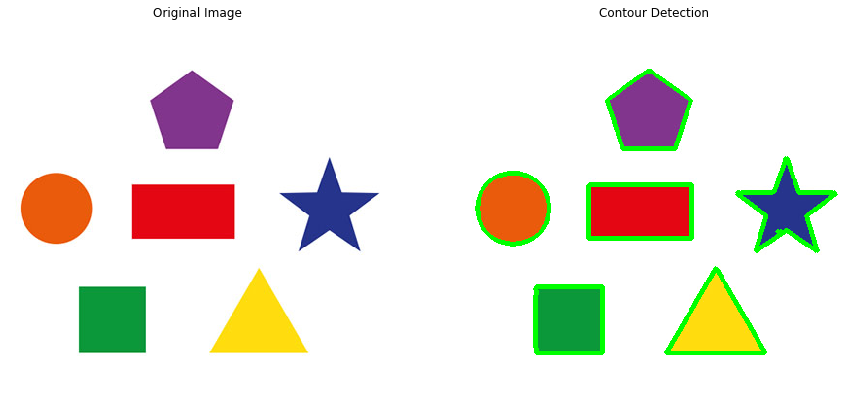

In [8]:
img = cv2.imread('media/M4/shapescontour.jpg')
original = img.copy()

# Detect the edges to feed it into the find contour function
edges = cv2.Canny(img,50,200)

contours, hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

# draw the contours, here -1 means draw all detected contours
cv2.drawContours(img, contours, -1 , (0,255,0), 3) 

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(122);plt.imshow(img[:,:,::-1]);plt.title("Contour Detection");plt.axis('off');

### <font style="color:rgb(134,19,348)"> Contour Detection on Thresholded Image:  </font>
**Now you can also detect contours by passing a thresholded image in the find Contour function, in short you can preprocess an image with any function that outputs a binary black and white mask**

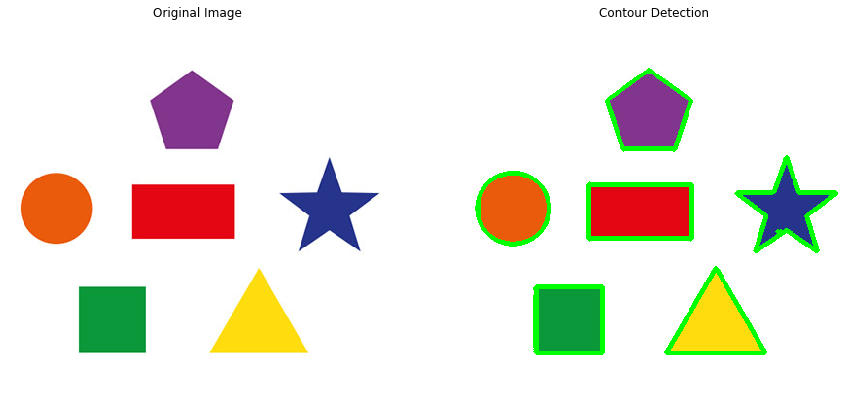

In [9]:
grayimg = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(grayimg,240,255,cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img, contours, -1 , (0,255,0), 3) 

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(original[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(img[:,:,::-1]);plt.title("Contour Detection");plt.axis('off');

### <font style="color:rgb(134,19,348)"> Drawing Individual Contours  </font>
Instead of drawing all contours you can choose to draw any individual contour.

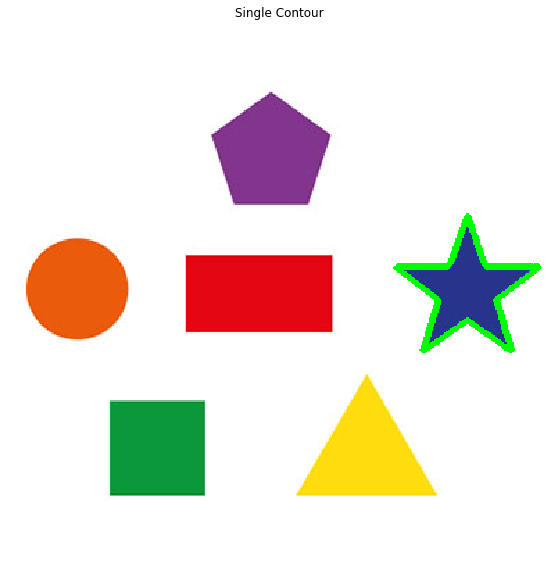

In [11]:
sample_img =  original.copy()

#index of contour to draw
index = 2

# extract the contour of the required index, in this case we are extracting the 3rd contour
cnt = contours[index]

# draw only the required contour
cv2.drawContours(sample_img, [cnt], 0 , (0,255,0), 3) 

plt.figure(figsize=[10,10])
plt.imshow(sample_img[:,:,::-1]);plt.title("Single Contour");plt.axis('off');

### <font style="color:rgb(134,19,348)"> Retrieval Modes:  </font>
Now there are different retrieval modes in findcontours function which determines how the contours are returned. <br>
Some important modes are:
- `cv2.RETR_EXTERNAL:` retrieves only the extreme outer contours.
- `cv2.RETR_LIST:` retrieves all of the contours without establishing any hierarchical relationships.
- `cv2.RETR_TREE:` retrieves all of the contours and reconstructs a full hierarchy of nested contours.
- `cv2.RETR_CCOMP:` retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.

**Note: Most of the times you'll use either `cv2.RETR_EXTERNAL` or `cv2.RETR_LIST`**

For more information regarding Retrieval modes [Read here](https://docs.opencv.org/4.1.0/d9/d8b/tutorial_py_contours_hierarchy.html)



### <font style="color:rgb(134,19,348)"> List vs External approximation modes  </font>
See how the results look for both methods

Using RETR_External we get 1 and using RETR_LIST we get 6


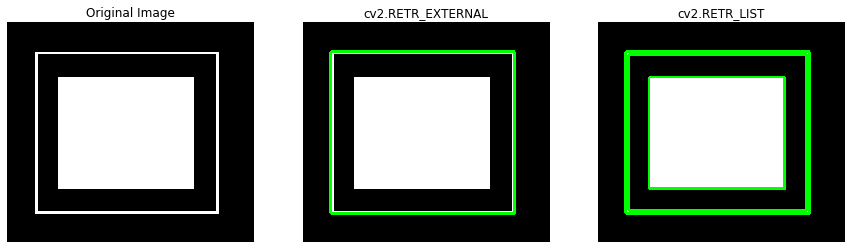

In [12]:
img = cv2.imread('media/M4/externallist.png')

# making 2 copies, one for RETR_EXTERNAL and one for RETR_LIST
list_image = img.copy()
external_image = img.copy()

edges = cv2.Canny(img,50,200)

contours_ext, hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours_list, hierarchy = cv2.findContours(edges,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

# draw the contours, here -1 means draw all detected contours
cv2.drawContours(list_image, contours_list, -1 , (0,255,0), 3)
cv2.drawContours(external_image, contours_ext, -1 , (0,255,0), 3) 

print("Using RETR_External we get {} and using RETR_LIST we get {}".format(len(contours_ext), len(contours_list)))

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(img[:,:,::-1]);plt.title("Original Image");plt.axis('off')
plt.subplot(132);plt.imshow(external_image[:,:,::-1]);plt.title("cv2.RETR_EXTERNAL");plt.axis('off');
plt.subplot(133);plt.imshow(list_image[:,:,::-1]);plt.title("cv2.RETR_LIST");plt.axis('off');

### <font style="color:rgb(134,19,348)"> Contour Approximation Modes  </font>
Two most used Approximation modes are:

- `cv2.CHAIN_APPROX_NONE:` stores absolutely all the contour points
- `cv2.CHAIN_APPROX_SIMPLE:` compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.

See the results for approx NONE and approx Simple on a rectangle image here.

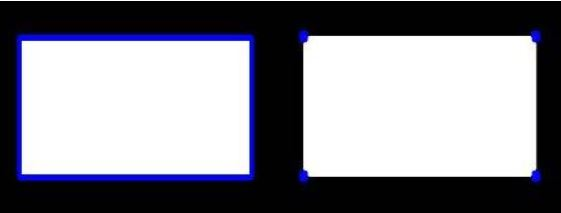

In [14]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Points required to store a sigle contour when using cv2.CHAIN_APPROX_NONE: {}".format(len(contours[0])))

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Points required to store a sigle contour when using cv2.CHAIN_APPROX_SIMPLE: {}".format(len(contours[0])))

Points required to store a sigle contour when using cv2.CHAIN_APPROX_NONE: 272
Points required to store a sigle contour when using cv2.CHAIN_APPROX_SIMPLE: 12


## <font style="color:rgb(134,19,348)"> Hierarchy  </font>

Normally we use the cv.findContours() function to detect objects in an image, right, Sometimes objects are in different locations. But in some cases, some shapes are inside other shapes. Just like nested figures. In this case, we call outer one as parent and inner one as child. This way, contours in an image has some relationship to each other. And we can specify how one contour is connected to each other, like, is it child of some other contour, or is it a parent etc. Representation of this relationship is called the Hierarchy

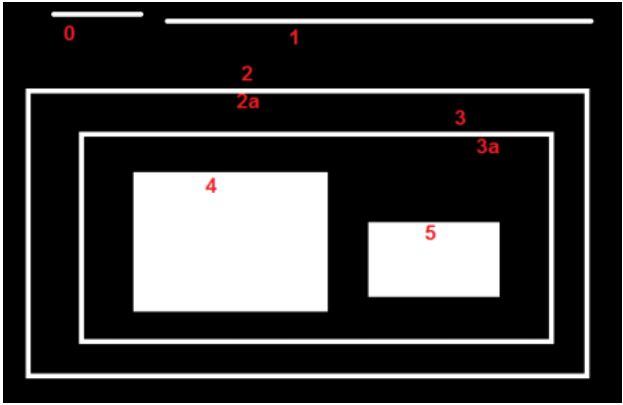
<br>
[Read here](https://docs.opencv.org/4.1.0/d9/d8b/tutorial_py_contours_hierarchy.html) for a great explanation on hierarchy

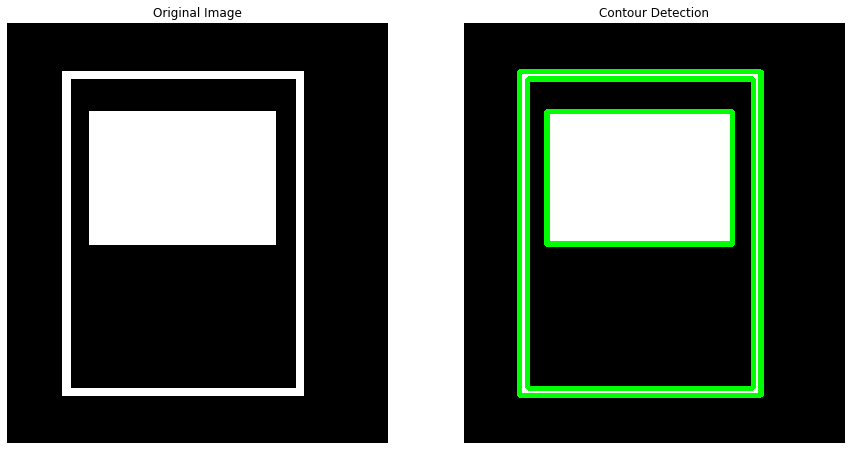

In [17]:
img = cv2.imread('media/M4/game2.png')
original = img.copy()

grayimg = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(grayimg,240,255,cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img, contours, contourIdx= 0 , color= (0,255,0), thickness= 3 , hierarchy=hierarchy , maxLevel=2) 

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(original,cmap='gray');plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(img[:,:,::-1]);plt.title("Contour Detection");plt.axis('off');

**You can easily see which contour falls in which hierarchy by making use of maxlevel in drawcontours**

**You can also see the hierarchy of each contour and extract your target contour via its hierarchical properties. <br>
It goes like this: Next, previous, child, parent**

In [18]:
hierarchy

array([[[-1, -1,  1, -1],
        [-1, -1,  2,  0],
        [-1, -1, -1,  1]]], dtype=int32)